<a href="https://colab.research.google.com/github/erazocar/usefultools/blob/main/modifycross.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Extracting cross section data from TELEMAC2D results**

Please use this notebook if you want to extract the results from control sections from TELEMAC2D simulation. Since the idea is to keep it quick and simple, the extraction will be a combination of using this script along with uusing excel for manipulating the data.

In [160]:
#import all necessary libraries.
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [161]:
#Set the number of rows and columns to display by the dataframe object
pd.set_option("display.max_rows", 10, "display.max_columns", 5)

#Include the names of the columns accordingly.
names = ['TIME', 'Rhein_upstream_(Fm780900)','Rhein_mid0_(Fm789600)', 'Rhein_mid_(Fm798300)', 'Rhein_mid2_(Fm807600)', 'Rhein_wesel_(Fm813800)', 'DYKE_BREACH802000']

Upload the documents that you would like to read and modify by clicking on the folder symbol. Remove the headers and any other data that is not a number and upload the data as a txt file.

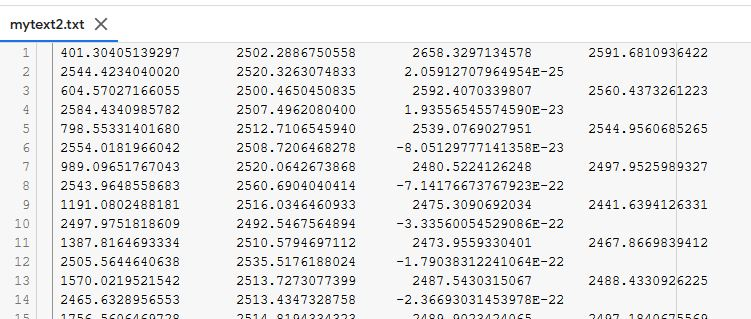



In [162]:
#Read the file and parse it to a string object.
with open("mytext2.txt") as f:
  content = f.readlines()
  res = ''
  for i in itertools.islice(content, 0, len(content), 2), itertools.islice(content,1,len(content),2):
    res += ' '.join(i)

The variable "res" contains now the correct values for each of the variables included per each cross section. Run the following code, copy and paste the data in excel, change text to columns with delimiter as white space. Depending on your simulation run, it will take around 5 seconds or so to finish. 

In [163]:
#Separate the results by splitting them to two different sets.
l = res.split('\n')

In [169]:
#Create panda series and modify the indexes so that column names can be added afterwards.
arr = pd.Series(l)
a = pd.Series(arr[:math.floor(arr.size / 2)])
b = pd.Series(arr[math.floor(arr.size / 2):arr.size-1])

#Need to reset the indexes so that the series can be joined together.
b = b.reset_index(drop = True)

#Split the values to create a joined time series.
c = a.str.split(expand = True)
d = b.str.split(expand = True)

#Rename the columns accordingly to their indexes and join the series.
c.columns=names[:len(c.columns)]
d.columns = names[len(c.columns):len(names)]
final = c.join(d)

#Make the values inside the dataframe to be numeric
final = final.apply(pd.to_numeric)

TIME                         float64
Rhein_upstream_(Fm780900)    float64
Rhein_mid0_(Fm789600)        float64
Rhein_mid_(Fm798300)         float64
Rhein_mid2_(Fm807600)        float64
Rhein_wesel_(Fm813800)       float64
DYKE_BREACH802000            float64
dtype: object

From there onwards, copy the last columns denoted and put them on top with the other columns. Add the names for each column and create the time series graphs accordingly.

<Figure size 432x288 with 0 Axes>

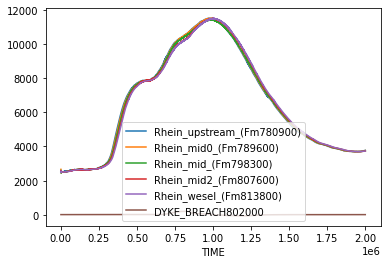

In [173]:
#Conjoined graphs.
plt.figure();
final.plot(x="TIME");

In [ ]:
#Export the series as a dataframe
final.to_csv(header=True)